# Ella Serber

## Research question/interests
My primary research question asks: Is there a relationship between gender and personality traits?
    
 Hypothesis 1: There is a significant relationship between gender and personality traits. 

My secondary research question asks: How do scores between men and women differ on the 5 personality traits?
    
Hypothesis 2: Based on extant research, on average, women will show higher scores than men on Extraversion, and Agreeableness, lower scores on Neuroticism, and there are will be no significant gender differences for Conscientiousness or Openness.

*Note: in the dataset, high neuroticism is at the low end of the continuum so a high score on the N factor corresponds to low neuroticism/high emotional stability

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from random import randint
import matplotlib.pyplot as plt

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')
dat_1

## EDA

In [ ]:
dat_1.shape
#Gives number of rows and columns

In [ ]:
dat_1.columns
#Gives all column names

In [ ]:
dat_1.head(5)
#Gives shortened dataframe for specified number of rows 

In [ ]:
dat_1.nunique(axis=0)
#Gives number of unique values for each column

In [ ]:
dat_1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#Descriptive stats for dataframe 
#Issues with age (why is mean 50767?)

In [ ]:
dat_1.age.unique()
#Gives each unique value for a column
#Not sure why there is a "99999999" value

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
print(dat_2)
#Drop unwanted columns

In [ ]:
pd.isnull(dat_2).values.any()
#No missing values

In [ ]:
np.isnan(dat_2).values.any()
#No NaN values

In [ ]:
dat_2.loc[dat['E1'] == 0]
#How to do this for all columns at once? I.e., check for "0" in all columns

In [ ]:
pd.unique(dat["gender"])

#Need to remove gender = 0 (missing) and gender = 3 (other)

dat_2.loc[dat['gender'] == 0]
dat_2.loc[dat['gender'] == 3]
#Want to drop these rows (without entering each manually) 

### Reverse Scoring

In [ ]:
#Reverse Scored Items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6

def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])
dat

### Factor scores

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]

In [ ]:
print(dat.E1.describe())
print(dat.E_Tot.describe())
#descriptive stats for one column 

## Subsets

In [ ]:
dat_reduced_g1 = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
values = [0,3]
dat_reduced_g = dat_reduced_g1[dat_reduced_g1.gender.isin(values) == False]
dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

In [ ]:
values = [0, 3, 1]
dat_f = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_f

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
1,2,22,29,35,42,26
2,2,35,14,38,49,45
3,2,22,17,37,26,41
4,2,34,30,44,34,34
5,2,16,36,36,31,33
...,...,...,...,...,...,...
19710,2,30,24,40,34,33
19711,2,21,26,42,36,39
19712,2,40,43,48,30,39
19714,2,21,19,42,36,35


In [ ]:
values = [0, 3, 2]
dat_m = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_m

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,44,49,46,47,43
7,1,39,45,41,44,42
11,1,30,36,35,30,38
15,1,28,41,17,42,47
23,1,33,38,41,31,38
...,...,...,...,...,...,...
19708,1,25,35,40,20,44
19713,1,14,39,43,37,30
19716,1,21,10,26,23,37
19717,1,21,20,38,43,42


### Visualizations

array([[<AxesSubplot:title={'center':'O_Tot'}>]], dtype=object)

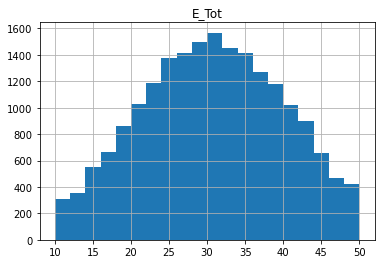

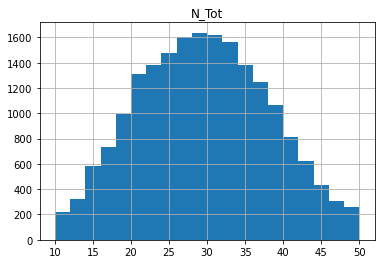

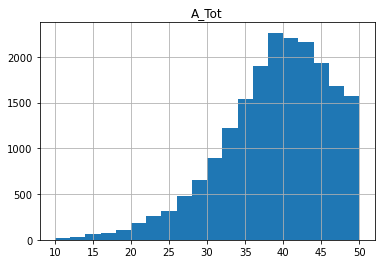

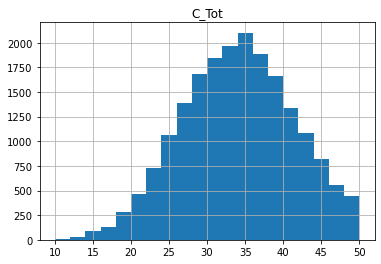

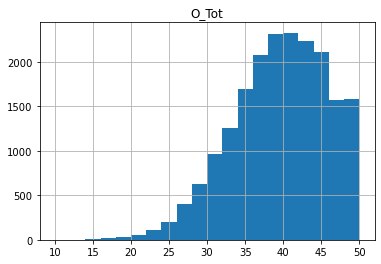

In [ ]:
dat_reduced_g.hist(column= "E_Tot", bins =20)
dat_reduced_g.hist(column= "N_Tot", bins =20)
dat_reduced_g.hist(column= "A_Tot", bins =20)
dat_reduced_g.hist(column= "C_Tot", bins =20)
dat_reduced_g.hist(column= "O_Tot", bins =20)

#Shows distribution of each factor for males and females (combined)

In [ ]:
dat_reduced_g.hist(column= "E_Tot", by = "gender", bins=20)
dat_reduced_g.hist(column= "N_Tot", by = "gender", bins=20)
dat_reduced_g.hist(column= "A_Tot", by = "gender", bins=20)
dat_reduced_g.hist(column= "C_Tot", by = "gender", bins=20)
dat_reduced_g.hist(column= "O_Tot", by = "gender", bins=20)

#Shows distribution of each factor for males and females (separately)

A_Tot       AxesSubplot(0.125,0.125;0.133621x0.755)
C_Tot    AxesSubplot(0.285345,0.125;0.133621x0.755)
E_Tot     AxesSubplot(0.44569,0.125;0.133621x0.755)
N_Tot    AxesSubplot(0.606034,0.125;0.133621x0.755)
O_Tot    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

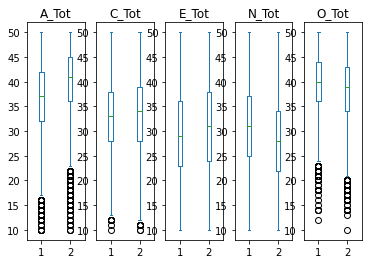

In [ ]:
dat_reduced_g.plot.box(by = "gender")

#Produces boxplot for each factor, separated by gender, and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively)

<seaborn.axisgrid.FacetGrid>

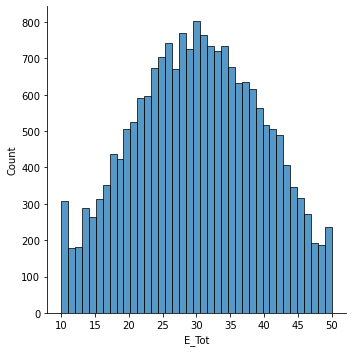

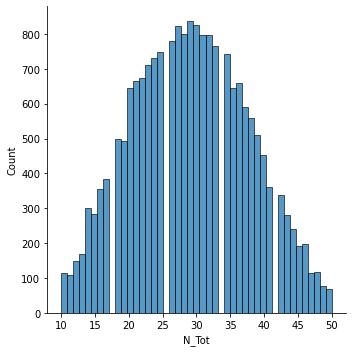

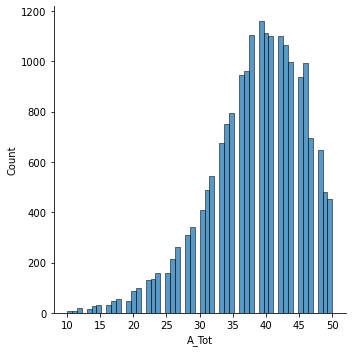

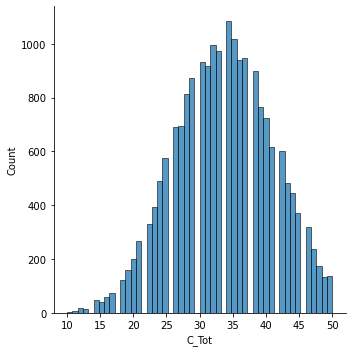

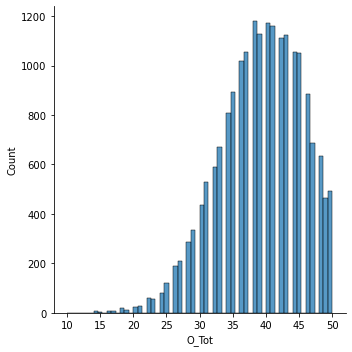

In [ ]:
sb.displot(dat_reduced_g["E_Tot"])
sb.displot(dat_reduced_g["N_Tot"])
sb.displot(dat_reduced_g["A_Tot"])
sb.displot(dat_reduced_g["C_Tot"])
sb.displot(dat_reduced_g["O_Tot"])

#Shows distribution of each factor for males and females (combined) -- similar to above hist plot 

<seaborn.axisgrid.PairGrid>

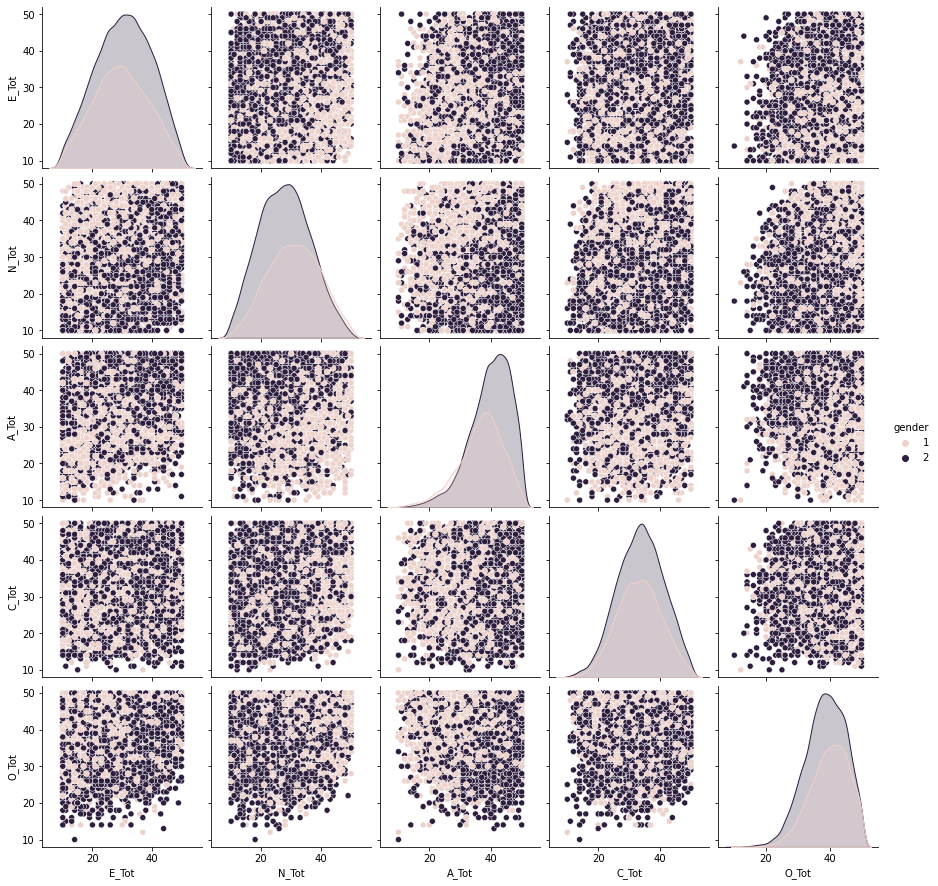

In [ ]:
sb.pairplot(dat_reduced_g, hue = "gender")
#Not very useful (too many data points)

In [ ]:
sb.barplot(x = "gender", y = "E_Tot", dat = dat_reduced_g)

ValueError: Could not interpret input 'gender'

array([[<AxesSubplot:title={'center':'E_Tot'}>,
        <AxesSubplot:title={'center':'N_Tot'}>],
       [<AxesSubplot:title={'center':'A_Tot'}>,
        <AxesSubplot:title={'center':'C_Tot'}>],
       [<AxesSubplot:title={'center':'O_Tot'}>, <AxesSubplot:>]],
      dtype=object)

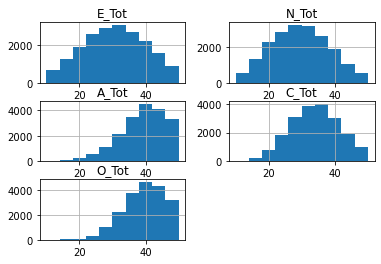

In [ ]:
dat_reduced.hist()
#Shows distribution of each factor (probs not useful since same as hist for each factor above; this one looks a bit messier)

<AxesSubplot:xlabel='gender'>

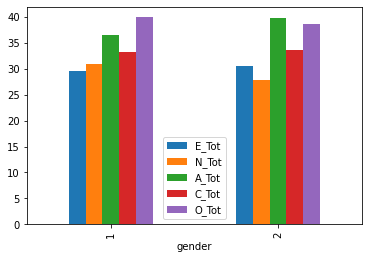

In [ ]:
dat_reduced_g.groupby("gender").mean().plot.bar()

<AxesSubplot:xlabel='gender'>

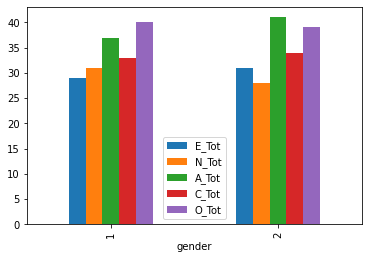

In [ ]:
dat_reduced_g.groupby("gender").median().plot.bar()

<AxesSubplot:>

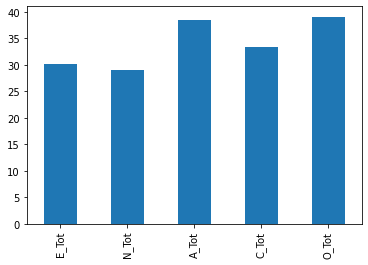

In [ ]:
dat_reduced.mean().plot.bar()

In [ ]:
dat.plot.scatter(x = "E_Tot")
#How to make the y-axis just the score values??

TypeError: scatter() missing 1 required positional argument: 'y'

<AxesSubplot:xlabel='gender', ylabel='E_Tot'>

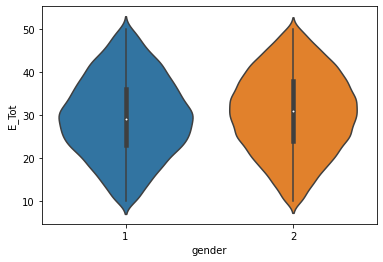

In [ ]:
sb.violinplot(dat_reduced_g, x="gender", y= "E_Tot", split = True)


# Analysis Pipeline

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

## Load Data

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')

## Clean Data

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
dat_3 = dat_2.copy().drop([19064], axis=0)

## Process Data


### Reverse Scoring

In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat = reverseScoring(dat_3, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])

### Create Factor Score Columns

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]

#Better way to do this? 

In [ ]:
E_Avg = sum(dat["E_Tot"])/len(dat)
A_Avg = sum(dat["A_Tot"])/len(dat)
N_Avg = sum(dat["N_Tot"])/len(dat)
C_Avg = sum(dat["C_Tot"])/len(dat)
O_Avg = sum(dat["O_Tot"])/len(dat)
#Total average (mean) for each factor

## Wrangle Data

In [ ]:
## Not sure what to put here -- I do not need to restructure the data or merge any new data

In [ ]:
dat_reduced_g = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

#Reduce dataset (create subsets) when only wanting total scores; with and without gender

# Method Chain

## Build Method Chains

### Load packages/functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from random import randint
import matplotlib.pyplot as plt
import project_functions2 as pf

### Method Chain 1

In [ ]:
dat_2 = (pd.read_csv("../data/raw/data.csv", sep='\t')
    .copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
    .copy().drop([19064], axis=0))
    
dat_2

#Want to add a step to remove rows where values in "gender" = 0 and 3 ????

### Method Chain 2

In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat_2 = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])

dat_3 = (pd.DataFrame(dat_2)
        .assign(E_Tot=lambda x: dat_2["E1"]+dat_2["E2"]+dat_2["E3"]+dat_2["E4"]+dat_2["E5"]+dat_2["E6"]+dat_2["E7"]+dat_2["E8"]+dat_2["E9"]+dat_2["E10"])
        .assign(N_Tot=lambda x: dat_2["N1"]+dat_2["N2"]+dat_2["N3"]+dat_2["N4"]+dat_2["N5"]+dat_2["N6"]+dat_2["N7"]+dat_2["N8"]+dat_2["N9"]+dat_2["N10"])
        .assign(A_Tot=lambda x: dat_2["A1"]+dat_2["A2"]+dat_2["A3"]+dat_2["A4"]+dat_2["A5"]+dat_2["A6"]+dat_2["A7"]+dat_2["A8"]+dat_2["A9"]+dat_2["A10"])
        .assign(C_Tot=lambda x: dat_2["C1"]+dat_2["C2"]+dat_2["C3"]+dat_2["C4"]+dat_2["C5"]+dat_2["C6"]+dat_2["C7"]+dat_2["C8"]+dat_2["C9"]+dat_2["C10"])
        .assign(O_Tot=lambda x: dat_2["O1"]+dat_2["O2"]+dat_2["O3"]+dat_2["O4"]+dat_2["O5"]+dat_2["O6"]+dat_2["O7"]+dat_2["O8"]+dat_2["O9"]+dat_2["O10"]))

dat_3

NameError: name 'dat_2' is not defined

## Wrap Method Chains in Function

In [ ]:
dat = pf.load_and_process("../data/raw/data.csv")
dat

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,2,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,2,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,2,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,2,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,1,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


# Analysis for RQ

## Create Subsets (total score columns with gender variations)

In [ ]:
#total scores without gender
#Note: recall lower N scores correspond to greater neuroticism; higher scores to greater emotional stability
dat_sub = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

In [ ]:
#total scores with gender = 1 (male) and 2 (female)
values = [0,3]
dat_sub_g1 = dat[["gender","E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
dat_sub_g = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

In [ ]:
#Female only
values = [0, 3, 1]
dat_f = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]
dat_f

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
1,2,22,29,35,42,26
2,2,35,14,38,49,45
3,2,22,17,37,26,41
4,2,34,30,44,34,34
5,2,16,36,36,31,33
...,...,...,...,...,...,...
19710,2,30,24,40,34,33
19711,2,21,26,42,36,39
19712,2,40,43,48,30,39
19714,2,21,19,42,36,35


In [ ]:
#Male only
values = [0, 3, 2]
dat_m = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]
dat_m

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,44,49,46,47,43
7,1,39,45,41,44,42
11,1,30,36,35,30,38
15,1,28,41,17,42,47
23,1,33,38,41,31,38
...,...,...,...,...,...,...
19708,1,25,35,40,20,44
19713,1,14,39,43,37,30
19716,1,21,10,26,23,37
19717,1,21,20,38,43,42


## Descriptive Statistics

In [ ]:
dat_m.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#For males

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,1.000000,29.542587,30.851341,36.549422,33.224632,39.866062
std,0.000000,9.164005,8.610305,7.318780,7.170913,6.076097
min,1.000000,10.000000,10.000000,10.000000,10.000000,12.000000
25%,1.000000,23.000000,25.000000,32.000000,28.000000,36.000000
50%,1.000000,29.000000,31.000000,37.000000,33.000000,40.000000
75%,1.000000,36.000000,37.000000,42.000000,38.000000,44.000000
max,1.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [ ]:
dat_f.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#For females

,gender,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,1.000000,29.542587,30.851341,36.549422,33.224632,39.866062
std,0.000000,9.164005,8.610305,7.318780,7.170913,6.076097
min,1.000000,10.000000,10.000000,10.000000,10.000000,12.000000
25%,1.000000,23.000000,25.000000,32.000000,28.000000,36.000000
50%,1.000000,29.000000,31.000000,37.000000,33.000000,40.000000
75%,1.000000,36.000000,37.000000,42.000000,38.000000,44.000000
max,1.000000,50.000000,50.000000,50.000000,50.000000,50.000000


In [ ]:
dat_sub_g.groupby('gender').mean()

#Male higher than female - N and O
#Female higher than male - E, A, C

,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
gender,,,,,
1,29.542587,30.851341,36.549422,33.224632,39.866062
2,30.525117,27.891439,39.676318,33.649449,38.569259


In [ ]:
dat_sub_g.groupby('gender').median()

#Male higher than female - N and O
#Female higher than male - E, A, C

,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
gender,,,,,
1,29.0,31.0,37.0,33.0,40.0
2,31.0,28.0,41.0,34.0,39.0


In [ ]:
print(dat_sub_g.groupby("gender")['E_Tot'].describe())
print(dat_sub_g.groupby("gender")['N_Tot'].describe())
print(dat_sub_g.groupby("gender")['A_Tot'].describe())
print(dat_sub_g.groupby("gender")['C_Tot'].describe())
print(dat_sub_g.groupby("gender")['O_Tot'].describe())

          count       mean       std   min   25%   50%   75%   max
gender                                                            
1        7608.0  29.542587  9.164005  10.0  23.0  29.0  36.0  50.0
2       11984.0  30.525117  9.227630  10.0  24.0  31.0  38.0  50.0
          count       mean       std   min   25%   50%   75%   max
gender                                                            
1        7608.0  30.851341  8.610305  10.0  25.0  31.0  37.0  50.0
2       11984.0  27.891439  8.427500  10.0  22.0  28.0  34.0  50.0
          count       mean       std   min   25%   50%   75%   max
gender                                                            
1        7608.0  36.549422  7.318780  10.0  32.0  37.0  42.0  50.0
2       11984.0  39.676318  6.740164  10.0  36.0  41.0  45.0  50.0
          count       mean       std   min   25%   50%   75%   max
gender                                                            
1        7608.0  33.224632  7.170913  10.0  28.0  33.0  38.0  

In [ ]:
from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import levene
import scipy.stats


ShapiroResult(statistic=0.9879238605499268, pvalue=2.4342684298987846e-37)
ShapiroResult(statistic=0.9910889267921448, pvalue=6.854899714923985e-33)
ShapiroResult(statistic=0.9597684741020203, pvalue=0.0)
ShapiroResult(statistic=0.9946048855781555, pvalue=3.436073492345436e-26)
ShapiroResult(statistic=0.97843337059021, pvalue=0.0)


In [ ]:
print(shapiro(dat_sub["E_Tot"]))
print(shapiro(dat_sub["N_Tot"]))
print(shapiro(dat_sub["A_Tot"]))
print(shapiro(dat_sub["C_Tot"]))
print(shapiro(dat_sub["O_Tot"]))

#none are normally distributed 

In [ ]:
print(levene(dat_m["E_Tot"], dat_f["E_Tot"]))
print(levene(dat_m["N_Tot"], dat_f["N_Tot"]))
print(levene(dat_m["A_Tot"], dat_f["A_Tot"]))
print(levene(dat_m["C_Tot"], dat_f["C_Tot"]))
print(levene(dat_m["O_Tot"], dat_f["O_Tot"]))

#N, A, C, and O are sig. (i.e., unequal variance across samples)
#E is NS (i.e., equal variance across samples)

LeveneResult(statistic=1.769397490006194, pvalue=0.18347214721719657)
LeveneResult(statistic=6.137695675397949, pvalue=0.013241333963795352)
LeveneResult(statistic=45.87921441176947, pvalue=1.2934208411212047e-11)
LeveneResult(statistic=7.803891285570765, pvalue=0.005218444735543739)
LeveneResult(statistic=13.556997819067627, pvalue=0.00023204858506756267)


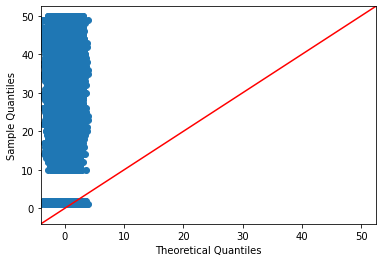

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(dat_sub_g, line='45')

#Not normal

In [ ]:
ttest_e = print(scipy.stats.ttest_ind(dat_m["E_Tot"], dat_f["E_Tot"], equal_var=True))
ttest_n = print(scipy.stats.ttest_ind(dat_m["N_Tot"], dat_f["N_Tot"], equal_var=False))
ttest_a = print(scipy.stats.ttest_ind(dat_m["A_Tot"], dat_f["A_Tot"], equal_var=False))
ttest_c = print(scipy.stats.ttest_ind(dat_m["C_Tot"], dat_f["C_Tot"], equal_var=False))
ttest_o = print(scipy.stats.ttest_ind(dat_m["O_Tot"], dat_f["O_Tot"], equal_var=False))

#Can use t-test based on Central Limit Theorem (data with sufficient sample size to overcome non-normal distribution)
#All values sig. (p < .05) --> there is significant difference in means for all factors

NameError: name 'scipy' is not defined

## Visualizations

array([[<AxesSubplot:title={'center':'O_Tot'}>]], dtype=object)

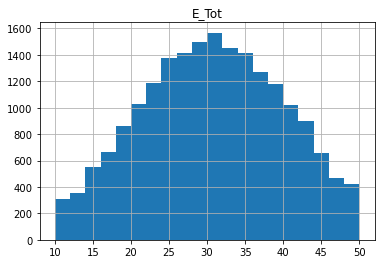

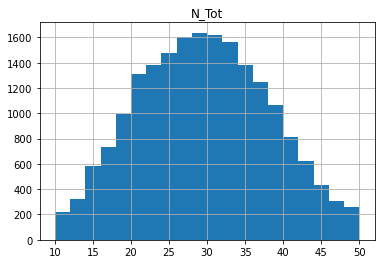

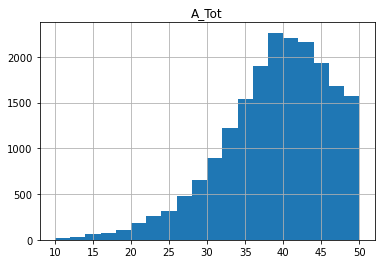

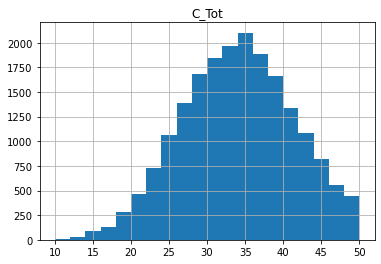

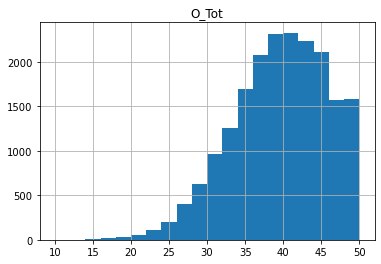

In [ ]:
dat_sub_g.hist(column= "E_Tot", bins =20)
dat_sub_g.hist(column= "N_Tot", bins =20)
dat_sub_g.hist(column= "A_Tot", bins =20)
dat_sub_g.hist(column= "C_Tot", bins =20)
dat_sub_g.hist(column= "O_Tot", bins =20)

#Shows distribution of each factor for males and females (combined)

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

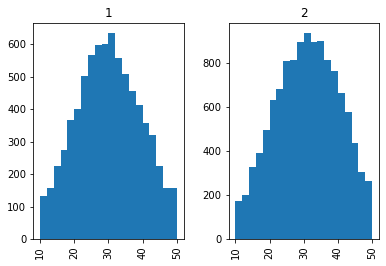

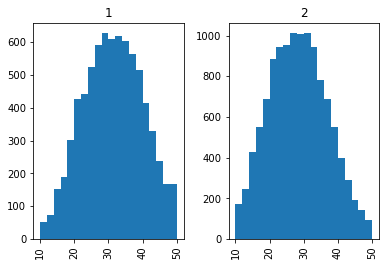

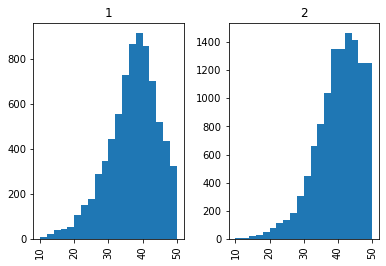

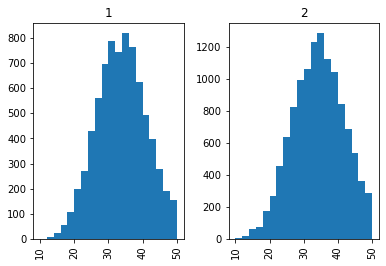

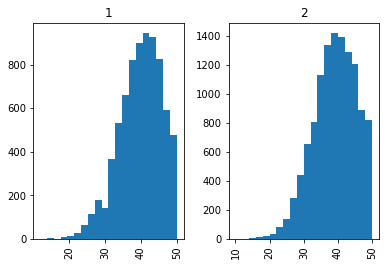

In [ ]:
dat_sub_g.hist(column= "E_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "N_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "A_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "C_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "O_Tot", by = "gender", bins=20)

#Shows distribution of each factor for males and females (separately)

<AxesSubplot:xlabel='gender'>

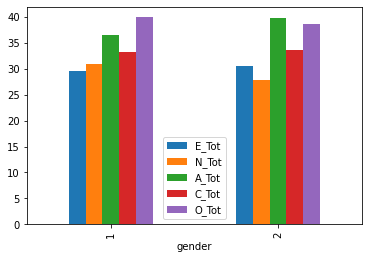

In [ ]:
dat_reduced_g.groupby("gender").mean().plot.bar()

#Shows mean score on each factor separated by gender 

<AxesSubplot:xlabel='gender', ylabel='count'>

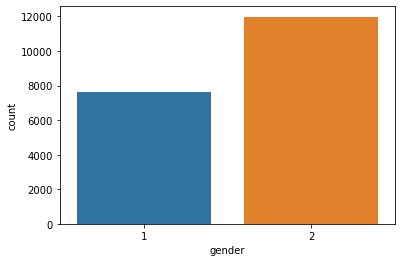

In [ ]:
sb.countplot(x = "gender", data = dat_sub_g)

#Many more females than males in sample 

<AxesSubplot:xlabel='gender', ylabel='E_Tot'>

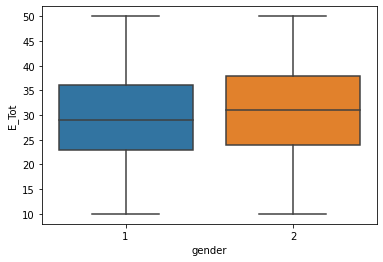

In [ ]:
sb.boxplot(x = "gender", y = "E_Tot", data = dat_sub_g)

#Boxplot showing scores on factor E separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)

AxesSubplot(0.125,0.125;0.775x0.755)


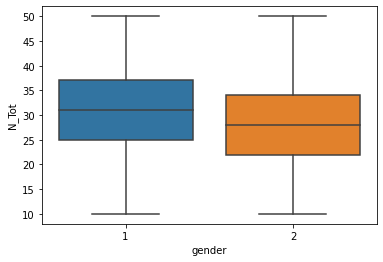

In [ ]:
sb.boxplot(x = "gender", y = "N_Tot", data = dat_sub_g)
#Boxplot showing scores on factor N separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)

AxesSubplot(0.125,0.125;0.775x0.755)


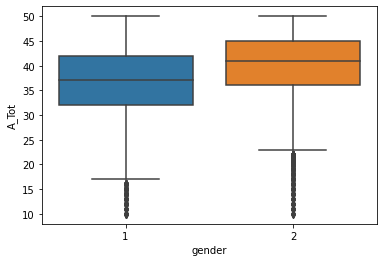

In [ ]:
sb.boxplot(x = "gender", y = "A_Tot", data = dat_sub_g)
#Boxplot showing scores on factor A separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)

AxesSubplot(0.125,0.125;0.775x0.755)


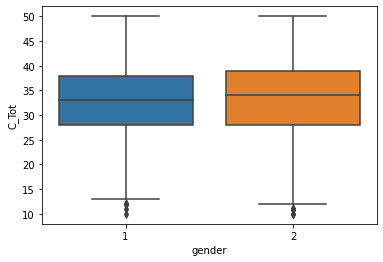

In [ ]:
sb.boxplot(x = "gender", y = "C_Tot", data = dat_sub_g)
#Boxplot showing scores on factor C separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)

<AxesSubplot:xlabel='gender', ylabel='O_Tot'>

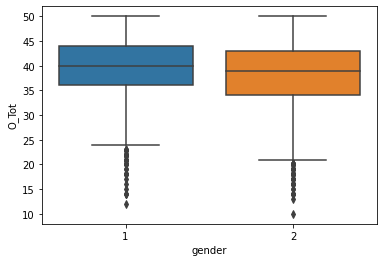

In [ ]:
sb.boxplot(x = "gender", y = "O_Tot", data = dat_sub_g)
#Boxplot showing scores on factor O separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)    

<AxesSubplot:xlabel='gender', ylabel='E_Tot'>

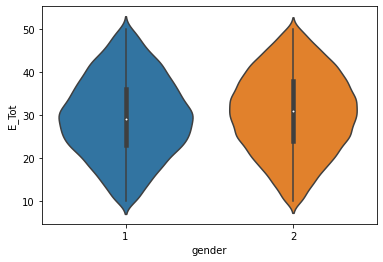

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "E_Tot")
#Violin plot showing density of scores on factor E, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

<AxesSubplot:xlabel='gender', ylabel='N_Tot'>

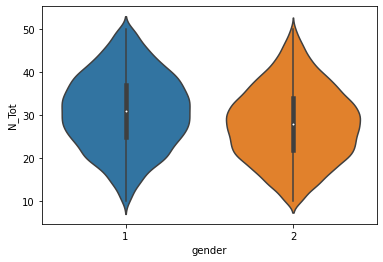

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "N_Tot")
#Violin plot showing density of scores on factor N, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

<AxesSubplot:xlabel='gender', ylabel='A_Tot'>

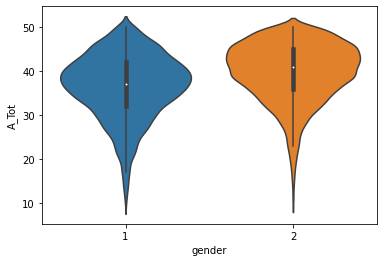

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "A_Tot")
#Violin plot showing density of scores on factor A, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

<AxesSubplot:xlabel='gender', ylabel='C_Tot'>

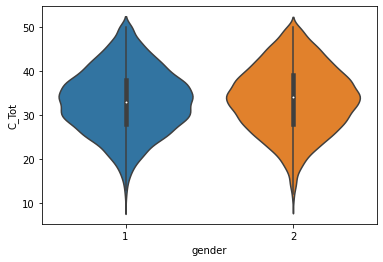

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "C_Tot")
#Violin plot showing density of scores on factor C, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

<AxesSubplot:xlabel='gender', ylabel='O_Tot'>

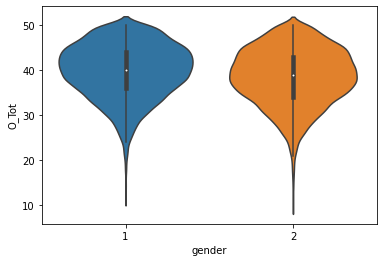

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "O_Tot")
#Violin plot showing density of scores on factor O, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

<AxesSubplot:xlabel='gender', ylabel='E_Tot'>

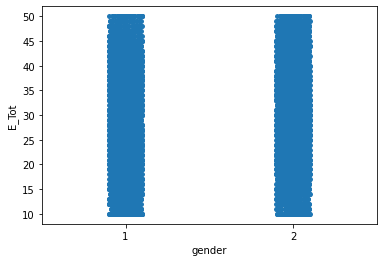

In [ ]:
sb.stripplot(x = "gender", y = "E_Tot", data = dat_sub_g, jitter = True)

<seaborn.axisgrid.PairGrid>

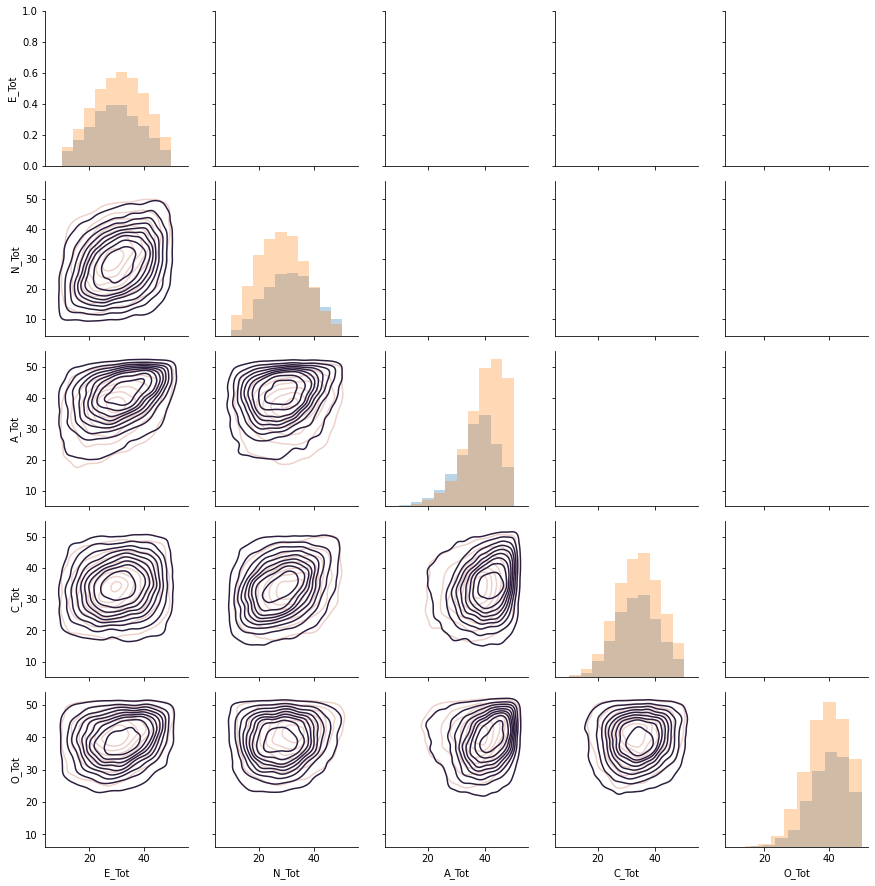

In [ ]:
grid = sb.PairGrid(dat_sub_g, hue = "gender")
grid.map_diag(plt.hist, alpha = .3)
grid.map_upper(plt.scatter, alpha = .2)
grid.map_lower(sb.kdeplot)
#Not useful, comparing factors with each other instead of gender

<seaborn.axisgrid.FacetGrid object>


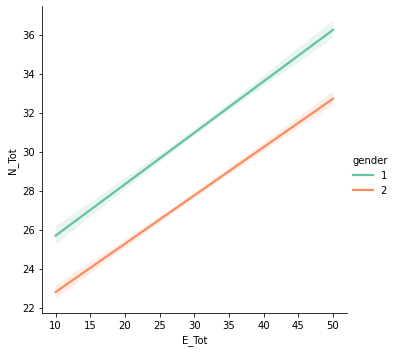

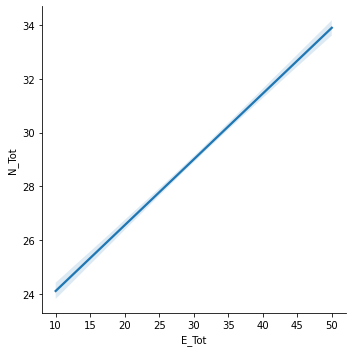

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "N_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "N_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>


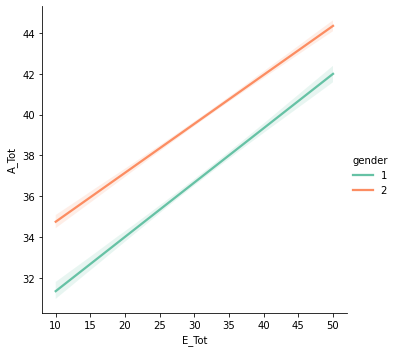

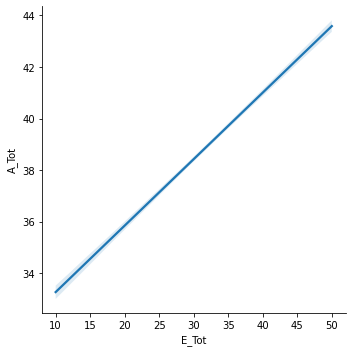

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "A_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "A_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>


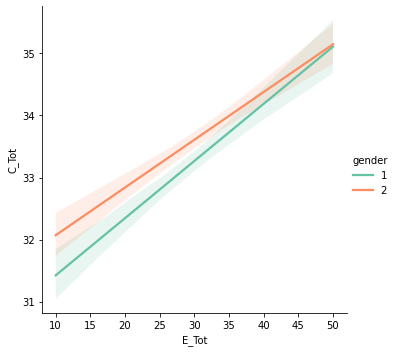

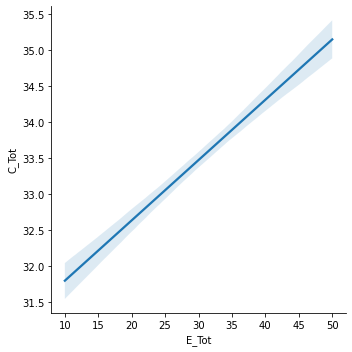

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "C_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "C_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>


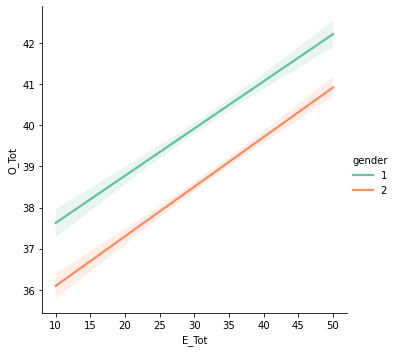

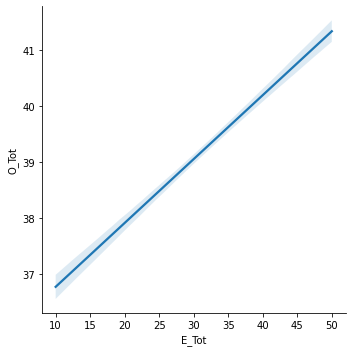

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "O_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>
<seaborn.axisgrid.FacetGrid object>


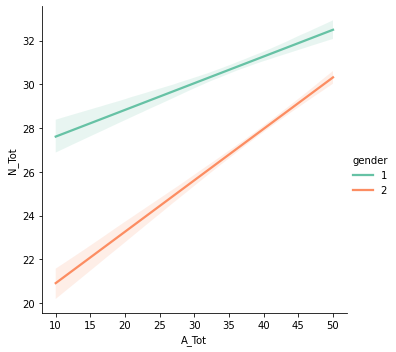

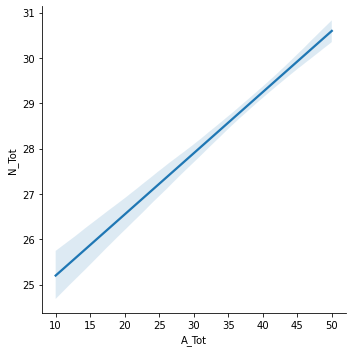

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "C_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "C_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>
<seaborn.axisgrid.FacetGrid object>


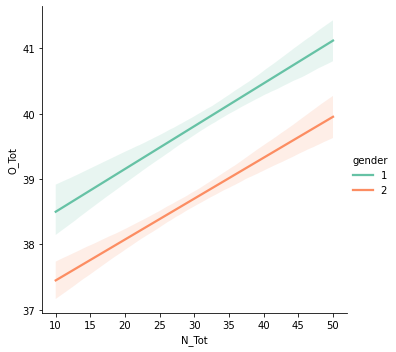

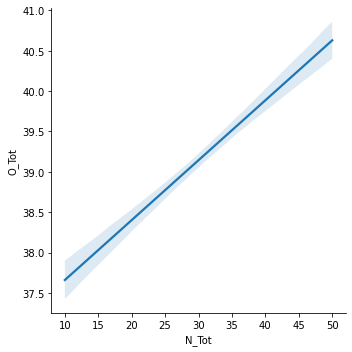

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "O_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>
<seaborn.axisgrid.FacetGrid object>


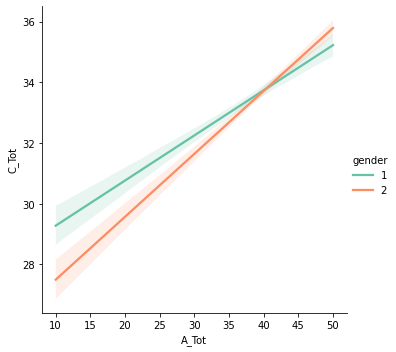

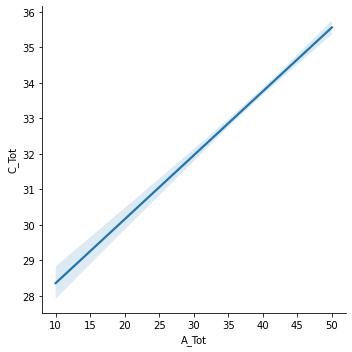

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "C_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "C_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>
<seaborn.axisgrid.FacetGrid object>


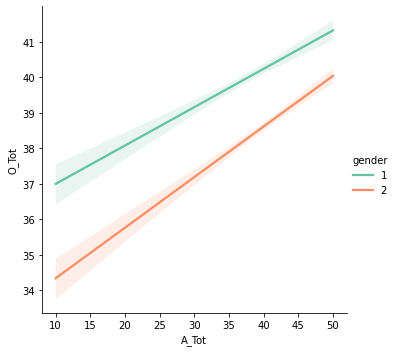

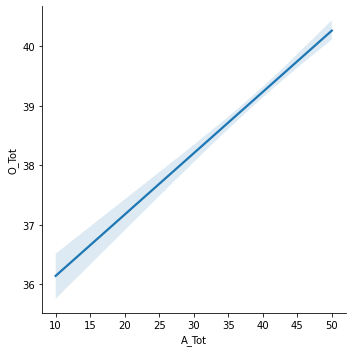

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "O_Tot", scatter = False))

<seaborn.axisgrid.FacetGrid object>
<seaborn.axisgrid.FacetGrid object>


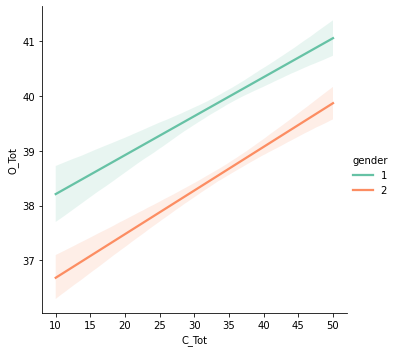

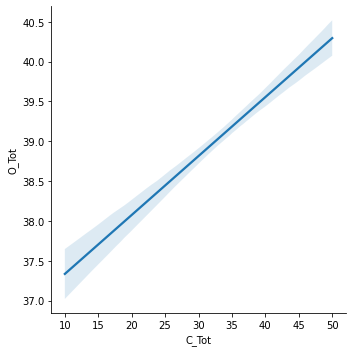

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "C_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "C_Tot", y = "O_Tot", scatter = False))